<a href="https://colab.research.google.com/github/ChayapolNine/Political-Affiliation-Prediction-Model/blob/main/Political%20Affiliation%20Prediction%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HW2-FRA503 Machine Learning**

##Import Library and Data
*   นำ numpy, pandas, matplotlib.pyplot และ preprocessing ใน sklearn เข้ามาเพื่อนำคำสั่งภายใน Library มาใช้ในการประมวลผลข้อมูล

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

*   Dataset ที่นำมาใช้ประกอบด้วย result_constituencies_Candidate, Candidate_Constituency และ result_constituencies_PartyList ซึ่งทั้ง 3 Dataset จะมีข้อมูล ดังต่อไปนี้

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/HW_ML/ML Dataset - ECT report 66.xlsx',sheet_name='result_constituencies_Candidate')
df1.head()

,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
0,ACR_1,ACR_1_1,9,459,0.43477,706
1,ACR_1,ACR_1_10,1,38275,36.25419,709
2,ACR_1,ACR_1_11,13,126,0.11935,712
3,ACR_1,ACR_1_12,12,127,0.12029,742
4,ACR_1,ACR_1_13,11,212,0.20081,761


In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/HW_ML/ML Dataset - ECT report 66.xlsx',sheet_name='Candidate_Constituency')
new_column_names = {'mp_app_party_id': 'party_id'}    # rename Attribute to merge
df2 = df2.rename(columns=new_column_names)
df2.head()

,mp_app_id,mp_app_name,mp_app_no,party_id,image_url
0,ACR_1_1,นางสาวปิยะมาศ บัวแก้ว,1,706,https://cdn.ectreport.com/images/mp_candidates...
1,ACR_1_10,นางสุขสมรวย วันทนียกุล,10,709,https://cdn.ectreport.com/images/mp_candidates...
2,ACR_1_11,นายการันต์ ลุนพันธ์,11,712,https://cdn.ectreport.com/images/mp_candidates...
3,ACR_1_12,นายไสว ผลาวงศ์,12,742,https://cdn.ectreport.com/images/mp_candidates...
4,ACR_1_13,นายสงบ โสภิพันธ์,13,761,https://cdn.ectreport.com/images/mp_candidates...


In [ ]:
df4 = pd.read_excel('/content/drive/MyDrive/HW_ML/ML Dataset - ECT report 66.xlsx',sheet_name='result_constituencies_PartyList')
df4.head()

,cons_id,party_id,party_list_vote,party_list_vote_percent
0,ACR_1,701,4550,4.30977
1,ACR_1,702,185,0.17523
2,ACR_1,703,67,0.06346
3,ACR_1,705,33576,31.80328
4,ACR_1,706,132,0.12503


*   โดยนำ Dataset ทั้ง 3 Sheet มารวมเป็น Dataset เดียว เพื่อดูความสัมพันธ์ของข้อมูลหลาย ๆ Feature

*   และนำ Feature ที่ไม่ได้ใช้ออก ได้แก่ image_url, mp_app_name ซึ่งเป็นข้อมูลที่มีความจำเพาะและไม่สามารถนำมาประมวลผลความสัมพันธ์กับ Feature อื่น ๆ ได้ และ  mp_app_vote_percent, party_list_vote_percent เป็น Feature เดียวกันกับ mp_app_vote, party_list_vote เพียงแต่อยู่ในรูปอัตราส่วนต่อหนึ่งร้อย
และ mp_app_id ออกเนื่องจากมีจำนวน class มาก และ ลักษณะข้อมูลเหมือนกับ Feature mp_app_no และ cons_id

In [ ]:
df3 = pd.merge(df1, df2)                                 # merge result_constituencies_Candidate AND Candidate_Constituency
df3.drop('image_url', axis = 1, inplace = True)          # Delete unused attributes
df3.drop('mp_app_name', axis = 1, inplace = True)
df3.drop('mp_app_vote_percent', axis = 1,inplace = True)
df3.drop('mp_app_id', axis = 1,inplace = True)
df4.drop('party_list_vote_percent', axis = 1,inplace = True)    # Delete unused attributes

df = pd.merge(df3, df4)
df.head()

,cons_id,mp_app_rank,mp_app_vote,party_id,mp_app_no,party_list_vote
0,ACR_1,9,459,706,1,132
1,ACR_1,1,38275,709,10,9761
2,ACR_1,13,126,712,11,408
3,ACR_1,12,127,742,12,36
4,ACR_1,11,212,761,13,672


# Defining the problem statement


Create a Predictive model which can tell Member of the House of Representative will join government , opposition , No Seat


*   Government ฝ่ายรัฐบาล
*   Opposition ฝ่านค้าน
* No Seat ไม่ได้เข้าสภา



#**1. Basic Data Exploration**



# Data Exploration
ทำการ Exploration พบว่าข้อมูลมีจำนวนทั้งหมด 4777 Instace 6 Attributes และไม่มี Missing value โดยข้อมูลทั้ง 6 Attributes แบ่งเป็น 2 ประเภท ได้แก่

**ข้อมูลประเภท Numeric Attributes**

* mp_app_vote จำนวนคะแนนเสียง ส.ส. เขตที่ได้ (Discrete)
* party_list_vote จำนวนคะแนนเสียง ส.ส. บัญชีรายชื่อของพรรคนั้น (Discrete)

**ข้อมูลประเภท Categorical Attributes**

* mp_app_rank อันดับคะแนนเสียง ส.ส. เขตที่ได้ มีอันดับคะแนนเสียง ถึง 20 อันดับ(Ordinal)
* party_id รหัสพรรคการเมือง มีจำนวนพรรคที่ลงสมัคร 70 พรรค (Nominal)
* mp_app_no หมายเลขผู้สมัคร ส.ส. เขต มีหมายเลขผู้สมัคร สส เขต ถึง 20 หมายเลข (Nominal)
* cons_id รหัสเขตการเลือกตั้ง มีรหัสเขตทั้งหมด 400 เขต (Nominal)





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4777 entries, 0 to 4776
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cons_id          4777 non-null   object
 1   mp_app_rank      4777 non-null   int64 
 2   mp_app_vote      4777 non-null   int64 
 3   party_id         4777 non-null   int64 
 4   mp_app_no        4777 non-null   int64 
 5   party_list_vote  4777 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 261.2+ KB


In [ ]:
df.describe()

,mp_app_rank,mp_app_vote,party_id,mp_app_no,party_list_vote
count,4777.000000,4777.000000,4777.000000,4777.000000,4777.000000
mean,6.707976,7660.450911,733.365083,6.703161,7106.247226
std,3.844704,12393.223784,23.971653,3.838639,12939.041057
min,1.000000,0.000000,701.000000,1.000000,0.000000
25%,3.000000,300.000000,709.000000,3.000000,221.000000
50%,6.000000,783.000000,729.000000,6.000000,766.000000
75%,10.000000,11835.000000,762.000000,9.000000,5446.000000
max,20.000000,63185.000000,786.000000,20.000000,83851.000000


In [ ]:
df.nunique()

cons_id             400
mp_app_rank          20
mp_app_vote        2880
party_id             67
mp_app_no            20
party_list_vote    2790
dtype: int64

In [ ]:
df.isnull().sum()

cons_id            0
mp_app_rank        0
mp_app_vote        0
party_id           0
mp_app_no          0
party_list_vote    0
dtype: int64

# Visual Exploratory Data (Categorical)
ทำการ Visualization ข้อมูลประเภท Categorical เพื่อดูลักษณะข้อมูล, Distribution และการกระจ่ายตัวของข้อมูลด้วย histogram graph

**Categorical Attributes** :
'mp_app_rank', 'party_id', 'mp_app_no', 'cons_id'

In [ ]:
#define categorical attributes
categorical_attributes = ['party_id','mp_app_rank','mp_app_no','cons_id']

In [ ]:
#find mean of density of all categorical attributes
for i in range(len(categorical_attributes)):
    print(categorical_attributes[i],df[categorical_attributes[i]].value_counts().mean())


party_id 71.29850746268657
mp_app_rank 238.85
mp_app_no 238.85
cons_id 11.9425


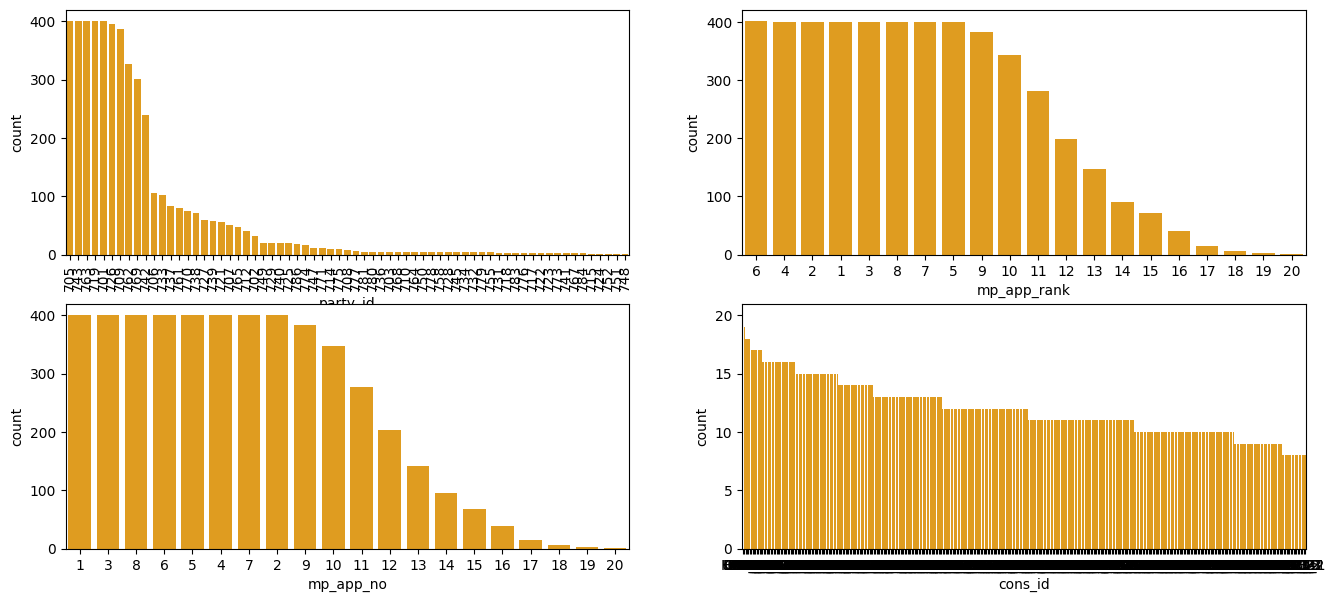

In [ ]:
#bar plot for categorical attributes sorted by count subplots 2*2
fig, axes = plt.subplots(2, 2, figsize=(16, 7))
for i, ax in enumerate(axes.flatten()):
    if i < len(categorical_attributes):
        if(categorical_attributes[i] == 'party_id'):
            sns.countplot(x=categorical_attributes[i], data=df, ax=ax , color='orange',order = df[categorical_attributes[i]].value_counts().index)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        sns.countplot(x=categorical_attributes[i], data=df, ax=ax , color='orange',order = df[categorical_attributes[i]].value_counts().index)


## จากการทำ  Visualization สามารถสรุปข้อมูลได้ดังนี้

**party_id**
*   กราฟข้อมูลของ party_id มีลักษณะเบ้ขวา และจำนวน class มีมากต้องทำ Transform data เพื่อลดจำนวน Class
*   Insight มีพรรคการเมื่องใหญ่ ๆ หรือพักการเมื่อที่มีชื่อเช่น 705 (เพื่อไทย) , 743 (พลังประชารัฐ) จะลงผู้สมัครจำนวนมากเพื่อเพิ่มโอกาศในการเข้าสภา ส่วนพรรคอื่น ๆ รองลงมาจะลงสมัคร สส. อยู่ที่ค่าเฉลี่ยคือ 70 คนต่อพรรค และพรรคใหม่หรือพรรคที่ไม่มีชื่อลงสมัคร สส. น้อย ประมาณ 1-10 คนต่อพรรค

**mp_app_rank**
* กราฟข้อมูลของ mp_app_rank มีลักษณะเบ้ขวา กราฟเริ่มมีค่าอยู่ในช่วงตั้งแต่ 1-16 อันดับแรก **อันดับหลังจาก 16 สมมติฐานให้เป็น Outlier**
* Insight ข้อมูลส่วนใหญ๋จะกระจุกตัวอยู่ในช่วง 1-10 อันดับ และค่อยลดลงเรื่อย ๆ ทำให้สามารถคาดการณ์ได้ว่าใน 1 เขตเลือกตั้งจะมีผู้สมัคร สส ประมาณ 1 - 10 คน เนื่องจากอันดับของผู้สมัคร สส กระจุกตัวอยู่ในช่วง 1-10 อันดับ แสดงให้เห็นว่าใน 1 เขตการเลือกจะมีผู้สมัครอยู่ประมาณ 1 - 10 คน

**mp_app_no**
* กราฟข้อมูลของ mp_app_no มีลักษณะเบ้ขวา กราฟเริ่มมีค่าอยู่ในช่วงตั้งแต่ 1-16 หมายเลขแรก **หมายเลขจาก 16 สมมติฐานให้เป็น outlier**
* Insight ข้อมูลส่วนใหญ๋จะกระจุกตัวอยู่ในช่วง 1-10 หมายเลขผู้สมัคร ซึ่งสัมพันธ์กับข้อมูล mp_app_rank ว่าจำนวนหมายเลขสัมพันธ์จำนวนอันดับ
* ในทำนองเดียวกันจึงสามารถคาดการณ์ได้ว่าใน 1 เขตเลือกตั้งจะมีผู้สมัคร สส ประมาณ 1 - 10 คน เนื่องจากหมายเลขผู้สมัครผู้สมัคร สส กระจุกตัวอยู่ในช่วง 1-10 หมายเลขผู้สมัคร แสดงให้เห็นว่าใน 1 เขตการเลือกจะมีผู้สมัครอยู่ประมาณ 1 - 10 คน

**cons_id**
* กราฟข้อมูลของ cons_id มีลักษณะเบ้ขวา และจำนวน Class มีมากต้องทำ transform data เพื่อลดจำนวน Class ข้อมูลแต่ละเขตกระจุกตัวเท่ากันสรุปได้ว่าไม่มี Outlier
* Insight ข้อมูลส่วนใหญ่ใน 1 รหัสเขตการเลือกตั้งจะมีผู้สมัคร สส เขตเดียวกันอยู่ที่ส่วนใหญ่อยู่ที่ 10 คน สัมพันธ์กับข้อมูล mp_app_rank และ mp_app_no ที่แสดงให้เห็นว่าใน 1 เขตการเลือกจะมีผู้สมัครอยู่ประมาณ 1 - 10 คน

In [ ]:
#remove mp_app_rank > 16
df = df[df.mp_app_rank < 16]
#remove mp_app_no > 16
df = df[df.mp_app_no < 16]

mp_app_rank อันดับหลังจาก 16 สมมติฐานให้เป็น Outlier จึงทำการ Filter mp_app_rank < 16 ออก

mp_app_no หมายเลขหลังจาก 16 สมมติฐานให้เป็น Outlier จึงทำการ Filter mp_app_no < 16 ออก

In [ ]:
# #replace cons_id with region in df
regions = {
    'Central': ['BKK', 'NBI', 'NPT', 'NSN', 'NMA', 'PBI', 'PCT', 'PNA', 'PNB', 'PRE', 'PRI', 'PTE', 'PTN'],
    'North': ['BRM', 'CMI', 'KRI', 'LEI', 'LPG', 'LPN', 'LRI', 'MDH', 'MKM', 'MSN', 'NAN', 'NPM', 'NWT', 'NYK', 'RBR', 'RET', 'STN', 'TAK', 'TRG', 'UTT', 'YST'],
    'Northeast': ['ACR', 'BKN', 'KSN', 'NBP', 'NKI', 'NRI', 'PYO', 'SNI', 'SSK', 'TRT', 'UBN', 'UDN'],
    'South': ['ATG', 'KPT', 'PKN', 'PLG', 'PLK', 'SKA', 'SKM', 'SKN', 'SKW', 'SRI', 'SBR', 'SPB', 'SPK', 'YLA'],
    'East': ['CCO', 'CTI', 'KBI', 'KKN', 'RNG', 'RYG', 'SCK']
}

#if cons_id starts with region_i i is 1 to 20 then region = region_i
for region in regions:
    for province in regions[region]:
        df.loc[df['cons_id'].str.startswith(province), 'region'] = region

df.drop('cons_id', axis = 1,inplace = True)

categorical_attributes = ['party_id','mp_app_rank','mp_app_no','region']

### Transform Data
**cons_id** (รหัสเขต) เปลี่ยนเป็น region(ภูมิภาค) เพื่อเป็นการลดจำนวน Class ให้ง่ายต่อการนำข้อมูลไปใช่ต่อ

โดยอ้างอิงข้อมูลการแบ่งภูมิภาคกับเขตจาก https://www.data.go.th/th/dataset/proviceandregionthailand

In [ ]:
party_data = {
    701: {'name': 'พรรคประชาธิปัตย์', 'status': 'government'},
    702: {'name': 'พรรคประชากรไทย', 'status': 'No Seat'},
    703: {'name': 'พรรคความหวังใหม่', 'status': 'No Seat'},
    705: {'name': 'พรรคเพื่อไทย', 'status': 'opposition'},
    706: {'name': 'พรรคชาติพัฒนากล้า', 'status': 'No Seat'},
    707: {'name': 'พรรคชาติไทยพัฒนา', 'status': 'government'},
    708: {'name': 'พรรคอนาคตไทย', 'status': 'No Seat'},
    709: {'name': 'พรรคภูมิใจไทย', 'status': 'government'},
    710: {'name': 'พรรคสังคมประชาธิปไตยไทย', 'status': 'No Seat'},
    711: {'name': 'พรรคประชาสามัคคี', 'status': 'No Seat'},
    712: {'name': 'พรรคประชาธิปไตยใหม่', 'status': 'No Seat'},
    713: {'name': 'พรรคพลังบูรพา', 'status': 'No Seat'},
    714: {'name': 'พรรคครูไทยเพื่อประชาชน', 'status': 'No Seat'},
    715: {'name': 'พรรคพลังสหกรณ์', 'status': 'No Seat'},
    717: {'name': 'พรรคถิ่นกาขาวชาววิไล', 'status': 'No Seat'},
    718: {'name': 'พรรครักษ์ผืนป่าประเทศไทย', 'status': 'No Seat'},
    719: {'name': 'พรรคเสรีรวมไทย', 'status': 'opposition'},
    720: {'name': 'พรรครักษ์ธรรม', 'status': 'No Seat'},
    721: {'name': 'พรรคเพื่อชาติ', 'status': 'opposition'},
    722: {'name': 'พรรคพลังประชาธิปไตย', 'status': 'No Seat'},
    723: {'name': 'พรรคภราดรภาพ', 'status': 'No Seat'},
    724: {'name': 'พรรคพลังไทยรักชาติ', 'status': 'No Seat'},
    725: {'name': 'พรรคช่วยชาติ', 'status': 'No Seat'},
    726: {'name': 'พรรคก้าวไกล', 'status': 'opposition'},
    727: {'name': 'พรรคทางเลือกใหม่', 'status': 'No Seat'},
    728: {'name': 'พรรคประชาภิวัฒน์', 'status': 'No Seat'},
    729: {'name': 'พรรคเส้นด้าย', 'status': 'No Seat'},
    731: {'name': 'พรรคพลังธรรมใหม่', 'status': 'No Seat'},
    732: {'name': 'พรรคไทยธรรม', 'status': 'No Seat'},
    733: {'name': 'พรรคไทยศรีวิไลย์', 'status': 'No Seat'},
    734: {'name': 'พรรครวมพลัง', 'status': 'No Seat'},
    736: {'name': 'พรรคไทยพร้อม', 'status': 'No Seat'},
    737: {'name': 'พรรคพลังปวงชนไทย', 'status': 'No Seat'},
    738: {'name': 'พรรคเพื่อชาติไทย', 'status': 'No Seat'},
    739: {'name': 'พรรครวมแผ่นดิน', 'status': 'No Seat'},
    740: {'name': 'พรรคประชาชาติ', 'status': 'opposition'},
    741: {'name': 'พรรคแผ่นดินธรรม', 'status': 'No Seat'},
    742: {'name': 'พรรคคลองไทย', 'status': 'No Seat'},
    743: {'name': 'พรรคพลังประชารัฐ', 'status': 'government'},
    745: {'name': 'พรรคพลังสังคม', 'status': 'No Seat'},
    747: {'name': 'พรรคเป็นธรรม', 'status': 'No Seat'},
    748: {'name': 'พรรคพลังเพื่อไทย', 'status': 'No Seat'},
    749: {'name': 'พรรคประชาไทย', 'status': 'No Seat'},
    750: {'name': 'พรรคกรีน', 'status': 'No Seat'},
    751: {'name': 'พรรคสามัญชน', 'status': 'No Seat'},
    752: {'name': 'พรรคภาคีเครือข่ายไทย', 'status': 'No Seat'},
    755: {'name': 'พรรคเพื่ออนาคตไทย', 'status': 'No Seat'},
    758: {'name': 'พรรคไทยรวมไทย', 'status': 'No Seat'},
    761: {'name': 'พรรคพลังสังคมใหม่', 'status': 'No Seat'},
    762: {'name': 'พรรคไทยสร้างไทย', 'status': 'opposition'},
    763: {'name': 'พรรครวมไทยสร้างชาติ', 'status': 'government'},
    764: {'name': 'พรรคมิติใหม่', 'status': 'No Seat'},
    765: {'name': 'พรรคไทยสมาร์ท', 'status': 'No Seat'},
    767: {'name': 'พรรคพลังสยาม', 'status': 'No Seat'},
    768: {'name': 'พรรคเสมอภาค', 'status': 'No Seat'},
    769: {'name': 'พรรคไทยภักดี', 'status': 'No Seat'},
    770: {'name': 'พรรคแนวทางใหม่', 'status': 'No Seat'},
    771: {'name': 'พรรคไทยชนะ', 'status': 'No Seat'},
    773: {'name': 'พรรคเพื่อไทรวมพลัง', 'status': 'No Seat'},
    774: {'name': 'พรรคราษฎร์วิถี', 'status': 'No Seat'},
    775: {'name': 'พรรคไทยเป็นหนึ่ง', 'status': 'No Seat'},
    776: {'name': 'พรรคท้องที่ไทย', 'status': 'No Seat'},
    777: {'name': 'พรรคเปลี่ยนอนาคต', 'status': 'No Seat'},
    778: {'name': 'พรรคใหม่', 'status': 'No Seat'},
    779: {'name': 'พรรคแรงงานสร้างชาติ', 'status': 'No Seat'},
    780: {'name': 'พรรคไทยก้าวหน้า', 'status': 'No Seat'},
    781: {'name': 'พรรคพลัง', 'status': 'No Seat'},
    783: {'name': 'พรรคชาติรุ่งเรือง', 'status': 'No Seat'},
    784: {'name': 'พรรครวมใจไทย', 'status': 'No Seat'},
    786: {'name': 'พรรคเปลี่ยน', 'status': 'No Seat'},
}
#add party_name and status to df matching party_id

for party_id in party_data:
    df.loc[df['party_id'] == party_id, 'party_name'] = party_data[party_id]['name']
    df.loc[df['party_id'] == party_id, 'status'] = party_data[party_id]['status']

df.head()


,mp_app_rank,mp_app_vote,party_id,mp_app_no,party_list_vote,region,party_name,status
0,9,459,706,1,132,Northeast,พรรคชาติพัฒนากล้า,No Seat
1,1,38275,709,10,9761,Northeast,พรรคภูมิใจไทย,government
2,13,126,712,11,408,Northeast,พรรคประชาธิปไตยใหม่,No Seat
3,12,127,742,12,36,Northeast,พรรคคลองไทย,No Seat
4,11,212,761,13,672,Northeast,พรรคพลังสังคมใหม่,No Seat


### Transform Data
**party_id** (รหัสพรรค) เปลี่ยนเป็น status(ขั้วอำนาจที่พรรคนั้นจะเข้าไปในสภา) ได้แก่ government , opposition , No Seat เพื่อเป็นการลดจำนวน Class ให้ง่ายต่อการนำข้อมูลไปใช่ต่อ

โดยอ้างอิงข้อมูลการแบ่งขั้วอำนาจจากข้อมูล พรรคฝ่ายค้าน และพรรคฝ่ายรัฐบาล ปี 2562

In [ ]:
df.head()

,mp_app_rank,mp_app_vote,party_id,mp_app_no,party_list_vote,region,party_name,status
0,9,459,706,1,132,Northeast,พรรคชาติพัฒนากล้า,No Seat
1,1,38275,709,10,9761,Northeast,พรรคภูมิใจไทย,government
2,13,126,712,11,408,Northeast,พรรคประชาธิปไตยใหม่,No Seat
3,12,127,742,12,36,Northeast,พรรคคลองไทย,No Seat
4,11,212,761,13,672,Northeast,พรรคพลังสังคมใหม่,No Seat


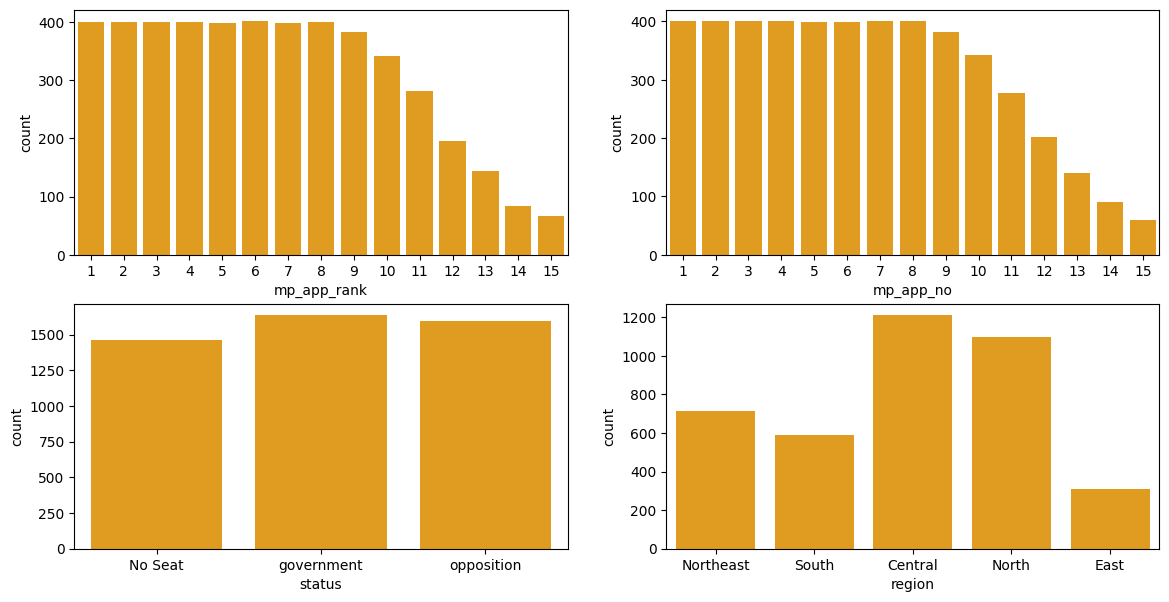

In [ ]:
categorical_attributes = ['mp_app_rank','mp_app_no','status','region']
#bar plot for categorical attributes sorted by count subplots 2*2
fig, axes = plt.subplots(2, 2, figsize=(14, 7))
for i, ax in enumerate(axes.flatten()):
    if i < len(categorical_attributes):
        sns.countplot(x=categorical_attributes[i], data=df, ax=ax , color='orange')

# Visual Exploratory Data (Numerical)
ทำการ Visualization ข้อมูลประเภท Numerical เพื่อดูลักษณะข้อมูล, Distribution และการกระจ่ายตัวของข้อมูลด้วย Boxplot และ Histogram Graph

**Numerical Attributes** :
'mp_app_vote', 'party_list_vote'

In [ ]:
#defining numerical attributes
numerical_attributes = ['mp_app_vote','party_list_vote']
#find mean of density of all categorical attributes
for i in range(len(numerical_attributes)):
    print(numerical_attributes[i],df[numerical_attributes[i]].value_counts().mean())


mp_app_vote 1.632
party_list_vote 1.6829268292682926


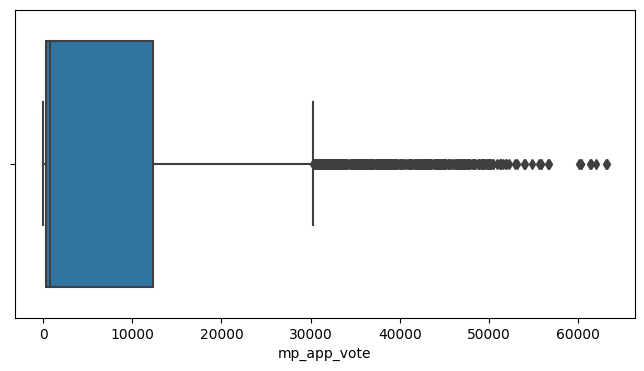

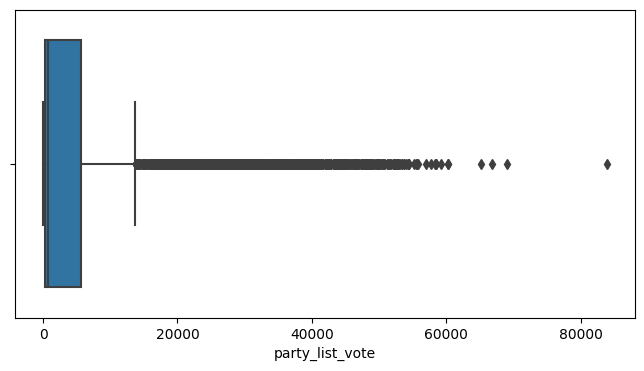

In [ ]:
#box plot for numerical attributes
for col in numerical_attributes:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=col, data=df)
    plt.show()

## Fliter Outlier

In [ ]:
#fliter outlier
df = df[df.mp_app_vote < 59000]
df = df[df.party_list_vote < 62000]

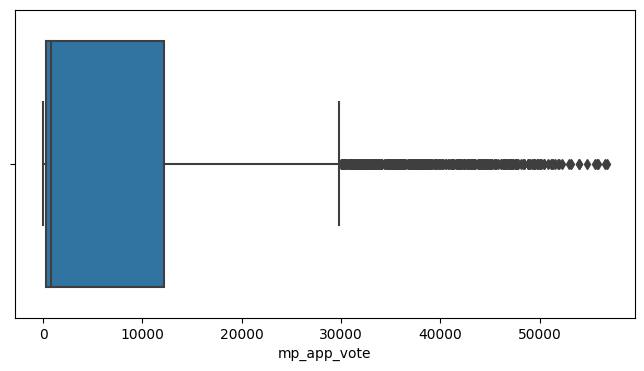

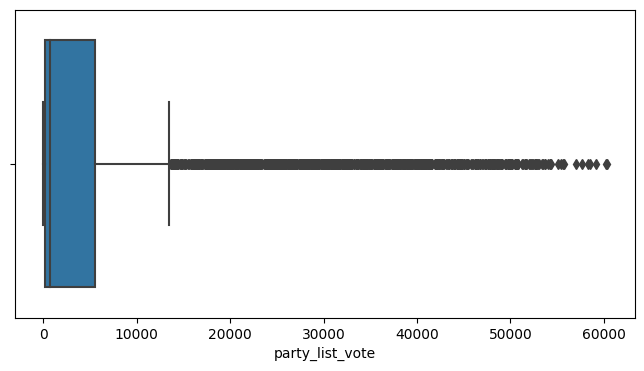

In [ ]:
#box plot for numerical attributes
for col in numerical_attributes:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=col, data=df)
    plt.show()

# Relationship Exploration

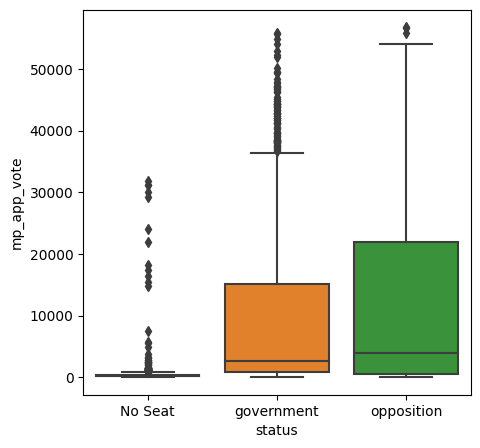

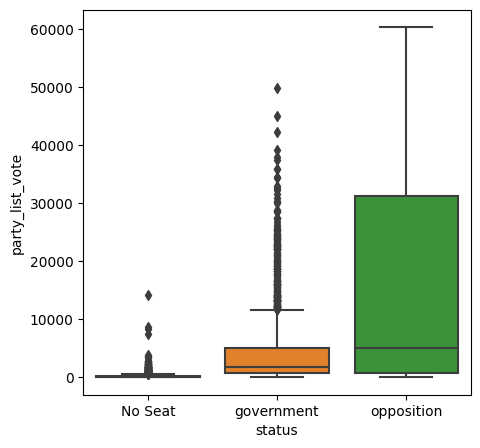

In [ ]:
# Box plots for Categorical Target Variable "status" and continuous predictors
for col in numerical_attributes:
    plt.figure(figsize=(5,5))
    sns.boxplot(x='status', y=col, data=df)
    plt.show()

Boxplot mp_app_vote vs status
- ค่า Median ของ Status No Seat , gorvernment , opposition ค่อนข้างที่จะอยู่ในช่วงเดียวกัน นั้นหมายความว่า mp_app_vote **ไม่ค่อยมีผลต่อการทำนาย status**

Boxplot party_list_vote vs status
- ค่า Median ของ Status No Seat , gorvernment , opposition ค่อนข้างที่จะอยู่ในช่วงเดียวกัน นั้นหมายความว่า mp_app_vote **มีผลต่อการทำนาย status**

<Figure size 2000x2000 with 0 Axes>

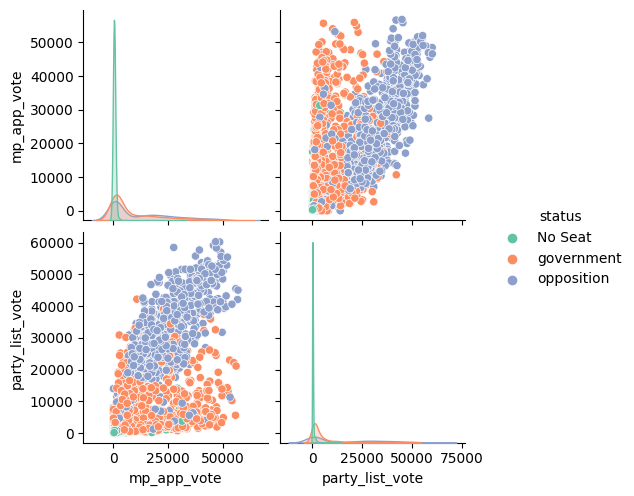

In [ ]:
fig = plt.figure(figsize=(20,20))
sns.pairplot(df[['mp_app_vote','party_list_vote','status']], hue='status', palette='Set2')
plt.show()

### จากการ Visualization กราฟ Pair Plot ระหว่าง mp_app_vote vs party_list_vote

ข้อมูลค่อนข้างที่จะแบ่งแยกการกระจุกตัวกันเมื่อ party_list_vote มีค่ามากจะสามารถแบ่ง status เป็น opposition ได้ แต่ถ้า party_list_vote มีค่าน้อยจะสามารถแบ่ง status เป็น government ได้

ซึ่งจะเห็นได้ว่า characteristics ของ การเลือกตั้งในประเทศไทยนั้นพรรคที่ได้รับคะแนนนิยมทั่วประเทศจะอยู่ในขั้วฝ่ายค้าน แต่พรรคที่ได้คะแนนนิยมทั่วประเทศน้อยกลายเป็นฝ่ายรัฐบาลแทน

### จากการ Visualization กราฟ Pair Plot ระหว่าง mp_app_vote vs status

ข้อมูลกระจุกตัวทับซ้อนกัน ไม่ว่า mp_app_vote จะเพิ่มขึ้นหรือลดลงก็**ไม่เห็นการเปลี่ยนแปลงหรือแบ่งกลุ่มอย่างชัดเจนของ status**

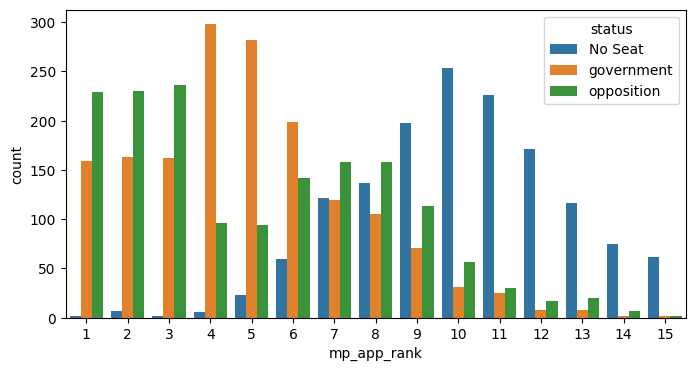

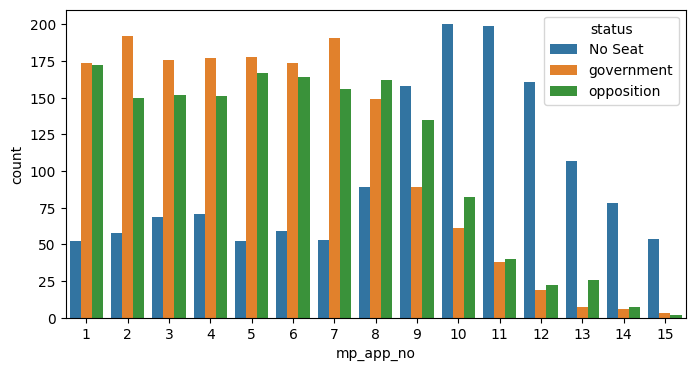

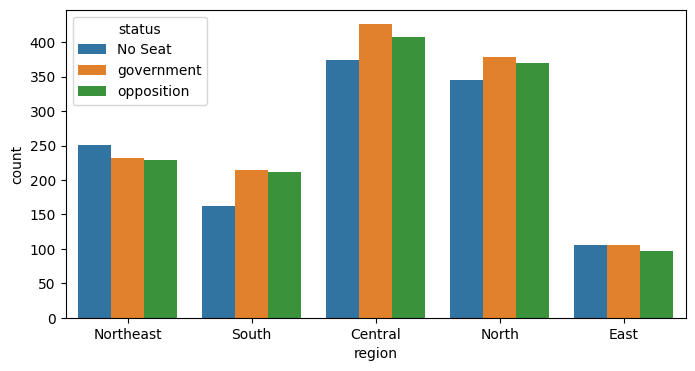

In [ ]:
#plot bar graph for categorical attributes vs party_id
categorical_attributes = ['mp_app_rank','mp_app_no','region']
for i in categorical_attributes:
    plt.figure(figsize=(8,4))
    sns.countplot(x=i, hue='status', data=df)
    plt.show()

mp_app_rank vs status

- จากกราฟสรุปได้ว่า อันดับคะแนนเสียงของ สส เขต มีอัตราส่วนของ Status ที่เปลี่ยนไปในช่วยที่ mp_app_rank อยู่อันดับต้นจะมีอัตราส่วนของ goverment และ opposition สูงมากเมื่อเทียบกับ No Seat และ เมื่อ mp_app_rank อยู่อันดับท้ายๆจะมีอัตราส่วนของ goverment และ opposition น้อยมากเมื่อเทียบกับ

mp_app_no vs status
- จากกราฟสรุปได้ว่า ลำดับหมายเลข สส เขต ในช่วง 1-7 อันดับแรกไม่ค่อยเห็นอันตราส่วนที่เปลี่ยนแปลงไปของ Status แต่เริ่มมีอันตราส่วนของ Status ที่เปลี่ยนแปลงไปในช่วงหลังจากอันดับที่ 8 จะเห็นได้ว่าอัตราส่วนของ No Seat จะที่จำนวนมากขึ้นเนื่องจากเมื่อมีลำดับผู้สมัคร สส มาก นั้นหมายถึงเขตนั้นจะมีการแข่งขันสูงทำให้ผู้สมัครที่ไม่ชนะอยู่จัดไปอยู่ในส่วนของ No Seat

region vs status
- จากกราฟสรุปได้ว่า region (ภูมิภาค) ส่งผลต่อการเปลี่ยนแปลงเล็กน้อยอัตราส่วนของ Status

## Statistical Feature Selection

In [ ]:
#Chi-square test for categorical attributes vs status
from scipy.stats import chi2_contingency
for i in categorical_attributes:
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['status'], df[i]))
    print('Chi-square test for', i, 'vs status')
    print('Chi-square statistic =', chi2)
    print('p-value =', p,'\n')

#ANOVA test for numerical attributes vs status
from scipy.stats import f_oneway
for i in numerical_attributes:
    f, p = f_oneway(df[i][df['status'] == 'government'], df[i][df['status'] == 'opposition'], df[i][df['status'] == 'No Seat'])
    print('ANOVA test for', i, 'vs status')
    print('F statistic =', f)
    print('p-value =', p,'\n')

Chi-square test for mp_app_rank vs status
Chi-square statistic = 2605.402971486249
p-value = 0.0 

Chi-square test for mp_app_no vs status
Chi-square statistic = 1325.0086507703081
p-value = 1.4716129324389646e-261 

Chi-square test for region vs status
Chi-square statistic = 10.299964924445549
p-value = 0.2446003047781377 

ANOVA test for mp_app_vote vs status
F statistic = 462.278665775473
p-value = 6.193599035720143e-184 

ANOVA test for party_list_vote vs status
F statistic = 877.8042093654119
p-value = 0.0 



## **Selected Categorical Variables:**

* **mp_app_rank :** Selected. ส่งผลต่อการเปลี่ยนแปลงอัตราส่วนของ Status  มากอย่างเห็นได้ชัดเจน
* **region :** Selected **(Rejected)**  ส่งผลต่อการเปลี่ยนแปลงอัตราส่วน Status เล็กน้อย ค่าส่วนใหญ่อยู่ที่ 33:33:33
* **mp_app_no** Selected ส่งผลต่อการเปลี่ยนแปลงอัตราส่วนของ Status  มากอย่างเห็นได้ชัด

## **Selected Numurical Variables**
* **party_list_vote** Selected. จากการทำ Visualization และ Statistical p < 0.05 พบว่า party_list_vote ส่งผลต่อ status
* **mp_app_vote** **Rejected!** จากการทำ Visualization mp_app_vote ไม่มีผลต่อ status

#**2. Data Preprocessing**

## การ Preprocessing เพื่อนำไปสร้าง Model เปรียบเทียบในหัวข้อ Model construction
*   นำ MinMaxScaler มาใช้ในการปรับ Feature ให้อยู่ในช่วง 0-1 โดย Feature ที่นำมาปรับ ได้แก่ mp_app_rank, mp_app_no และ party_list_vote ซึ่งเป็น Features ที่นำมาใช้ในการทำนาย Target

<ipython-input-79-c7a8b82bcd3e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tf['party_list_vote'] = np.log1p(df_tf['party_list_vote'])
<ipython-input-79-c7a8b82bcd3e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tf['mp_app_vote'] = np.log1p(df_tf['mp_app_vote'])


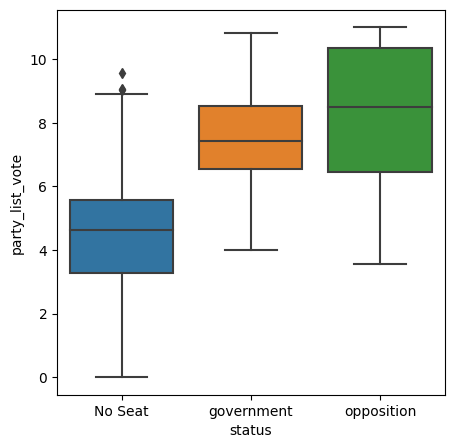

In [ ]:
#Create tf data
df_tf = df[['mp_app_no', 'mp_app_rank','party_list_vote','status','mp_app_vote']]

df_tf['party_list_vote'] = np.log1p(df_tf['party_list_vote'])
df_tf['mp_app_vote'] = np.log1p(df_tf['mp_app_vote'])

# Box plots for Categorical Target Variable "status" and continuous predictors
plt.figure(figsize=(5,5))
sns.boxplot(x='status', y='party_list_vote', data=df_tf)
plt.show()


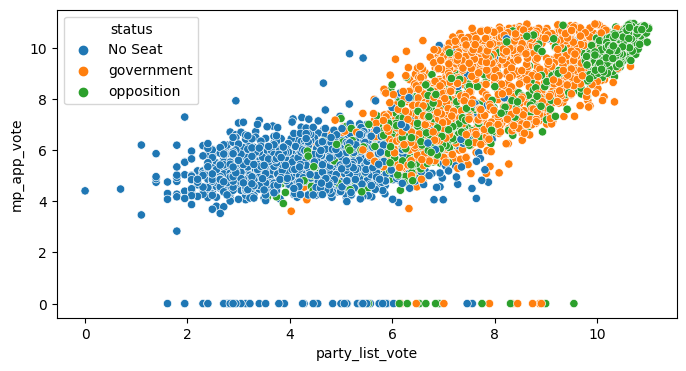

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='party_list_vote',y='mp_app_vote',data=df_tf,hue='status')
plt.show()

In [ ]:
#normalize
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
df_tf[['party_list_vote','mp_app_no','mp_app_rank']] = min_max_scaler.fit_transform(df_tf[['party_list_vote','mp_app_no','mp_app_rank']])
df.head()

<ipython-input-81-442bf7171bbc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tf[['party_list_vote','mp_app_no','mp_app_rank']] = min_max_scaler.fit_transform(df_tf[['party_list_vote','mp_app_no','mp_app_rank']])


,mp_app_rank,mp_app_vote,party_id,mp_app_no,party_list_vote,region,party_name,status
0,9,459,706,1,132,Northeast,พรรคชาติพัฒนากล้า,No Seat
1,1,38275,709,10,9761,Northeast,พรรคภูมิใจไทย,government
2,13,126,712,11,408,Northeast,พรรคประชาธิปไตยใหม่,No Seat
3,12,127,742,12,36,Northeast,พรรคคลองไทย,No Seat
4,11,212,761,13,672,Northeast,พรรคพลังสังคมใหม่,No Seat


In [ ]:
categorical_attributes = ['mp_app_rank','mp_app_no']
numerical_attributes = ['party_list_vote']
#Chi-square test for categorical attributes vs status
print("Before Preprocessing\n")
from scipy.stats import chi2_contingency
for i in categorical_attributes:
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['status'], df[i]))
    print('Chi-square test for', i, 'vs status')
    print('Chi-square statistic =', chi2)
    print('p-value =', p,'\n')

#ANOVA test for numerical attributes vs status
from scipy.stats import f_oneway
for i in numerical_attributes:
    f, p = f_oneway(df[i][df['status'] == 'government'], df[i][df['status'] == 'opposition'], df[i][df['status'] == 'No Seat'])
    print('ANOVA test for', i, 'vs status')
    print('F statistic =', f)
    print('p-value =', p,'\n')

#Chi-square test for categorical attributes vs status
print("After Preprocessing\n")
for i in categorical_attributes:
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df_tf['status'], df_tf[i]))
    print('Chi-square test for', i, 'vs status')
    print('Chi-square statistic =', chi2)
    print('p-value =', p,'\n')

#ANOVA test for numerical attributes vs status
for i in numerical_attributes:
    f, p = f_oneway(df_tf[i][df_tf['status'] == 'government'], df_tf[i][df_tf['status'] == 'opposition'], df_tf[i][df_tf['status'] == 'No Seat'])
    print('ANOVA test for', i, 'vs status')
    print('F statistic =', f)
    print('p-value =', p,'\n')

Before Preprocessing

Chi-square test for mp_app_rank vs status
Chi-square statistic = 2605.402971486249
p-value = 0.0 

Chi-square test for mp_app_no vs status
Chi-square statistic = 1325.0086507703081
p-value = 1.4716129324389646e-261 

ANOVA test for party_list_vote vs status
F statistic = 877.8042093654119
p-value = 0.0 

After Preprocessing

Chi-square test for mp_app_rank vs status
Chi-square statistic = 2605.402971486249
p-value = 0.0 

Chi-square test for mp_app_no vs status
Chi-square statistic = 1325.0086507703081
p-value = 1.4716129324389646e-261 

ANOVA test for party_list_vote vs status
F statistic = 2353.533279212062
p-value = 0.0 



# 3.1 Model โดยไม่ผ่านการ Preprocessing
###- Decision Tree Model:

*   นำ Feature ทั้ง 3 Attribute ได้แก่ mp_app_rank, mp_app_no, party_list_vote และ Target คือ status ที่สนใจมาแบ่งข้อมูลออกเป็น 2 ส่วน ได้แก่ ส่วน Train 70% และส่วน Test 30% เพื่อนำมาสร้าง Model

*   หลังจากนั้นนำมาหา Decision Tree Model เนื่องจาก Target เป็น Categorical variables โดยนำข้อมูล X_train และ y_train มาใช้ในการสร้าง Model และนำมา Test ด้วย X_test และ y_test

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#split data to train and test
# X = df[['mp_app_rank','mp_app_no']]
X = df[['mp_app_no','mp_app_rank','party_list_vote']]
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)

#train model
model_dt = DecisionTreeClassifier(max_depth=5)
DTree = model_dt.fit(X_train, y_train)

#predict
y_predict = model_dt.predict(X_test)
y_predict_train = model_dt.predict(X_train)

## - Performance:

*   นำค่าที่ทำนายได้เปรียบเทียบกับ Target ที่เกิดขึ้นจริง และดู Performance ของ Train data กับ Test data

In [ ]:
#accuracy
accuracy_score(y_test, y_predict)

#proformance report
from sklearn.metrics import classification_report
print("\nTrain Model\n")
print(classification_report(y_train, y_predict_train))
print("\nTest Model\n")
print(classification_report(y_test, y_predict))


Train Model

              precision    recall  f1-score   support

     No Seat       0.88      0.85      0.87      1018
  government       0.74      0.76      0.75      1143
  opposition       0.71      0.71      0.71      1116

    accuracy                           0.77      3277
   macro avg       0.77      0.77      0.77      3277
weighted avg       0.77      0.77      0.77      3277


Test Model

              precision    recall  f1-score   support

     No Seat       0.88      0.83      0.85       442
  government       0.69      0.71      0.70       491
  opposition       0.67      0.67      0.67       472

    accuracy                           0.74      1405
   macro avg       0.74      0.74      0.74      1405
weighted avg       0.74      0.74      0.74      1405



*   สังเกตว่า Accuracy ของ Train กับ Test มีค่าใกล้เคียงกัน แปลว่า ไม่เกิดการ Overfit

### - Best max_depth:
*   นำค่า max_depth แต่ละค่ามาสร้าง Model และนำ Performance ที่ได้มา Plot เป็นกราฟความสัมพันธ์ ซึ่งเราจะสามารถเลือกค่า max_depth ที่ดีที่สุดได้ โดยเลือกค่าแรกที่เกิดการเปลี่ยนแปลง Accuracy และมีค่า Accuracy สูง
*   จากกราฟด้านล่าง ค่า max_depth ที่ดีที่สุด คือ 5

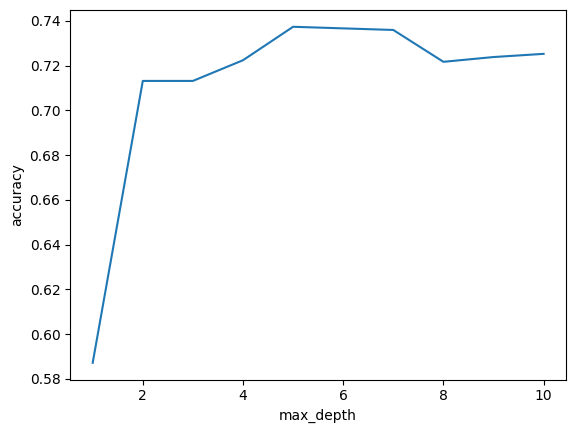

In [ ]:
#find best max_depth accuracy
max_depth = []
scores = []
for i in range(1, 11):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_predict))
    max_depth.append(i)
plt.plot(max_depth, scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

# **3.2 Model construction (Preprocessing)**



#- Decision Tree Model:

*   นำ Feature ทั้ง 3 Attribute ได้แก่ mp_app_rank, mp_app_no, party_list_vote และ Target คือ status ที่สนใจมาแบ่งข้อมูลออกเป็น 2 ส่วน ได้แก่ ส่วน Train 70% และส่วน Test 30% เพื่อนำมาสร้าง Model

*   หลังจากนั้นนำมาหา Decision Tree Model เนื่องจาก Target เป็น Categorical variables โดยนำข้อมูล X_train และ y_train มาใช้ในการสร้าง Model และนำมา Test ด้วย X_test และ y_test

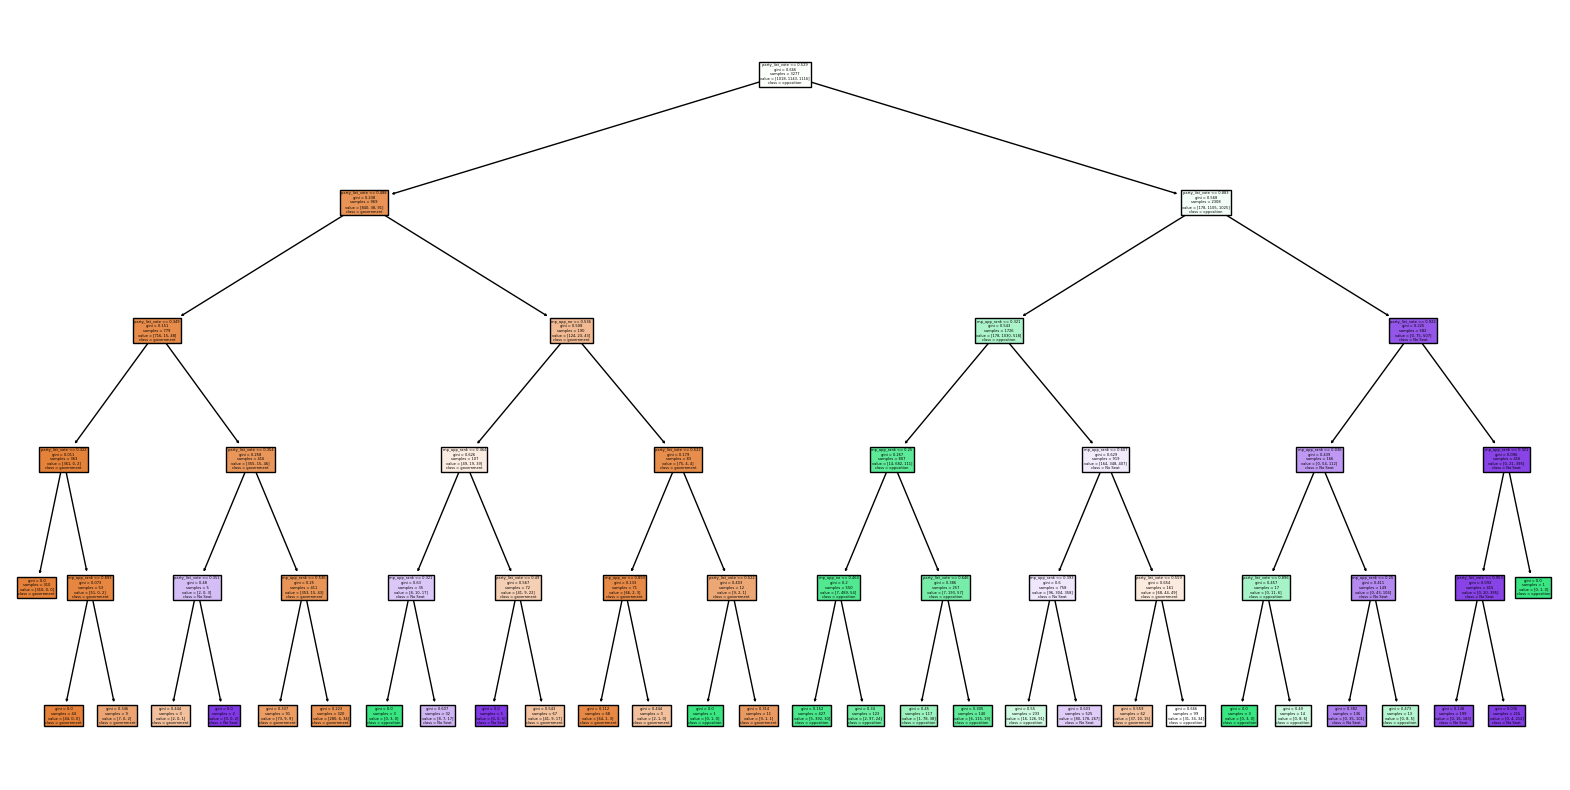

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#split data to train and test
X = df_tf[['mp_app_no','mp_app_rank','party_list_vote']]
y = df_tf['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)

#train model
model_dt = DecisionTreeClassifier(max_depth=5)
DTree = model_dt.fit(X_train, y_train)

#predict
y_predict = model_dt.predict(X_test)
y_predict_train = model_dt.predict(X_train)

from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model_dt, feature_names=X.columns, class_names=['government','opposition','No Seat'], filled=True)
plt.show()

# - Performance:

*   นำค่าที่ทำนายได้เปรียบเทียบกับ Target ที่เกิดขึ้นจริง และดู Performance ของ Train data กับ Test data

In [ ]:
#feature importances
print("feature importances\n")
print(model_dt.feature_importances_)
print(X.columns)
#accuracy
accuracy_score(y_test, y_predict)

#proformance report
from sklearn.metrics import classification_report
print("\nTrain Model\n")
print(classification_report(y_train, y_predict_train))
print("\nTest Model\n")
print(classification_report(y_test, y_predict))

feature importances

[0.01584974 0.16871213 0.81543812]
Index(['mp_app_no', 'mp_app_rank', 'party_list_vote'], dtype='object')

Train Model

              precision    recall  f1-score   support

     No Seat       0.88      0.85      0.87      1018
  government       0.74      0.76      0.75      1143
  opposition       0.71      0.71      0.71      1116

    accuracy                           0.77      3277
   macro avg       0.77      0.77      0.77      3277
weighted avg       0.77      0.77      0.77      3277


Test Model

              precision    recall  f1-score   support

     No Seat       0.88      0.83      0.85       442
  government       0.69      0.71      0.70       491
  opposition       0.67      0.68      0.67       472

    accuracy                           0.74      1405
   macro avg       0.74      0.74      0.74      1405
weighted avg       0.74      0.74      0.74      1405




*   สังเกตว่า Accuracy ของ Train กับ Test มีค่าใกล้เคียงกัน แปลว่า ไม่เกิดการ Overfit
*   โดยจาก Performance ของ Decision Tree Model พบว่าไม่ได้มีประสิทธิภาพสูงมาก จึงลองใช้ Model ที่มีความคลึงกันกับ Decision Tree แต่คาดว่าจะมีประสิทธิภาพดีกว่า นั่นคือ Random Forest Model ซึ่งเป็น Model ที่แบ่ง Dataset ออกเป็นส่วน ๆ และใช้หลักการเดียวกันกับ Decision Tree ในการทำนาย

In [ ]:
y_train.value_counts()

government    1143
opposition    1116
No Seat       1018
Name: status, dtype: int64

In [ ]:
y_test.value_counts()

government    491
opposition    472
No Seat       442
Name: status, dtype: int64

###- Confusion Matrix:
*   Plot Confusion Matrix เพื่อดูจำนวน Data ที่ Model ทำนายถูก/ผิดของ Train data และ Test data ซึ่งจะสังเกตว่า opposition และ government ทำนายสลับกันค่อนข้างเยอะทั้งของ Train data และ Test data

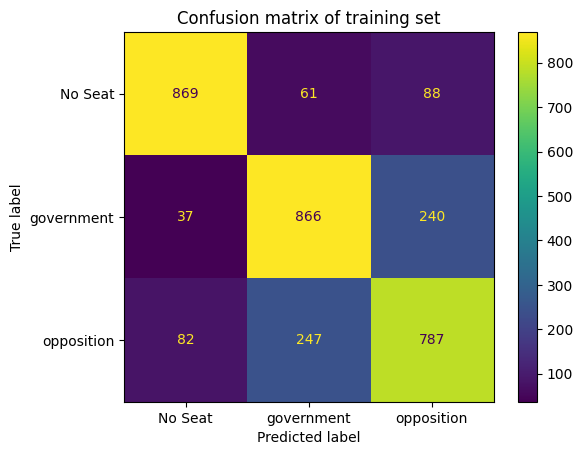

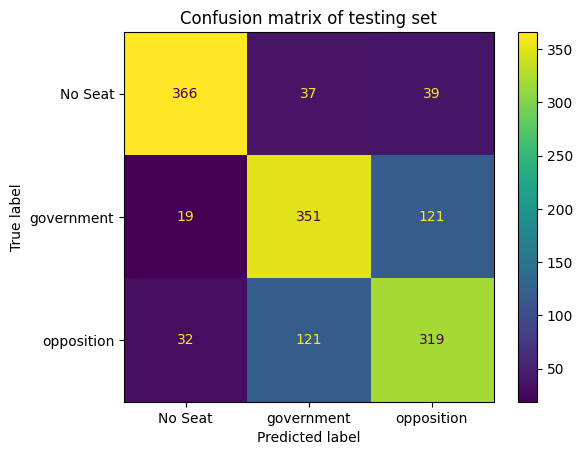

In [ ]:
# Plot confusion matrix of training set
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true=y_train, y_pred=y_predict_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No Seat', 'government','opposition'])
disp.plot()
plt.title('Confusion matrix of training set')
plt.show()

cm = confusion_matrix(y_true=y_test, y_pred=y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No Seat', 'government','opposition'])
disp.plot()
plt.title('Confusion matrix of testing set')
plt.show()

### - Best max_depth:
*   นำค่า max_depth แต่ละค่ามาสร้าง Model และนำ Performance ที่ได้มา Plot เป็นกราฟความสัมพันธ์ ซึ่งเราจะสามารถเลือกค่า max_depth ที่ดีที่สุดได้ โดยเลือกค่าแรกที่เกิดการเปลี่ยนแปลง Accuracy และมีค่า Accuracy สูง
*   จากกราฟด้านล่าง ค่า max_depth ที่ดีที่สุด คือ 5

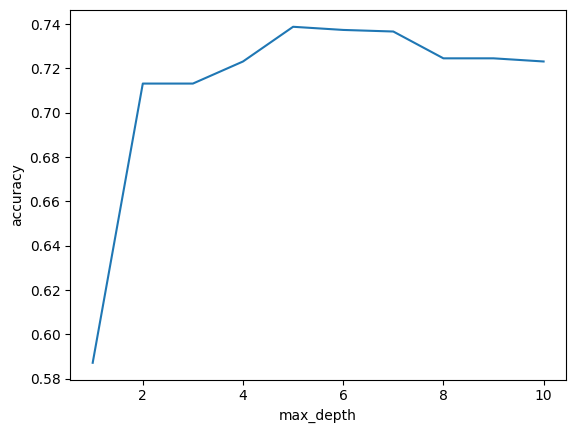

In [ ]:
#find best max_depth accuracy
max_depth = []
scores = []
for i in range(1, 11):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_predict))
    max_depth.append(i)
plt.plot(max_depth, scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

#**- Random Forest Model:**

*   นำ Feature ทั้ง 3 Attribute ได้แก่ mp_app_rank, mp_app_no, party_list_vote และ Target คือ status ที่สนใจมาแบ่งข้อมูลออกเป็น 2 ส่วน ได้แก่ ส่วน Train 70% และส่วน Test 30% เพื่อนำมาสร้าง Model
*   หลังจากนั้นนำมาหา Random Forest Model เนื่อจาก Target เป็น Categorical variables โดยนำข้อมูล X_train และ y_train มาใช้ในการสร้าง Model และนำมา Test ด้วย X_test และ y_test



Train Model

              precision    recall  f1-score   support

     No Seat       0.86      0.86      0.86      1018
  government       0.71      0.80      0.76      1143
  opposition       0.73      0.63      0.67      1116

    accuracy                           0.76      3277
   macro avg       0.77      0.76      0.76      3277
weighted avg       0.76      0.76      0.76      3277


Test Model

              precision    recall  f1-score   support

     No Seat       0.87      0.84      0.86       442
  government       0.67      0.77      0.72       491
  opposition       0.68      0.60      0.63       472

    accuracy                           0.73      1405
   macro avg       0.74      0.74      0.74      1405
weighted avg       0.74      0.73      0.73      1405



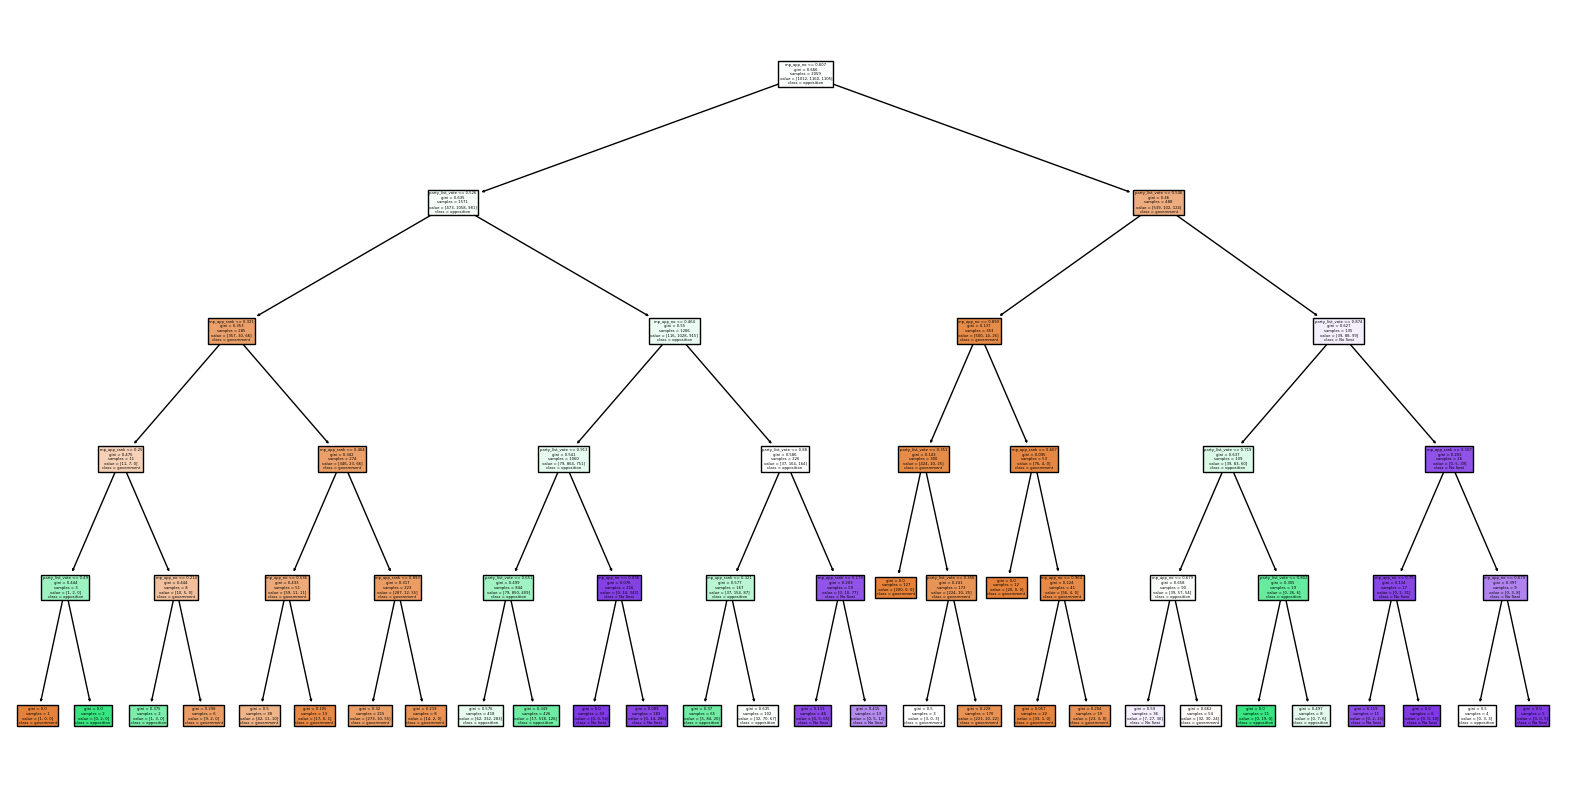

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#split data to train and test
X = df_tf[['mp_app_no','mp_app_rank','party_list_vote']]
y = df_tf['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)

#train model
model_ramdomforest = RandomForestClassifier(n_estimators=7,random_state=0,max_depth=5)
model_ramdomforest.fit(X_train, y_train)

#predict
y_predict = model_ramdomforest.predict(X_test)
y_predict_train = model_ramdomforest.predict(X_train)
#proformance report
from sklearn.metrics import classification_report
print("\nTrain Model\n")
print(classification_report(y_train, y_predict_train))
print("\nTest Model\n")
print(classification_report(y_test, y_predict))
#plot random forest
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model_ramdomforest.estimators_[1], feature_names=X.columns, class_names=['government','opposition','No Seat'], filled=True)
plt.show()

# - Performance:

*   นำค่าที่ทำนายได้เปรียบเทียบกับ Target ที่เกิดขึ้นจริง และดู Performance ของ Train data กับ Test data



In [ ]:
#feature importances
print("feature importances\n")
print(model_ramdomforest.feature_importances_)
print(X.columns)

#accuracy
accuracy_score(y_test, y_predict)

#proformance report
from sklearn.metrics import classification_report
print("\nTrain Model\n")
print(classification_report(y_train, y_predict_train))
print("\nTest Model\n")
print(classification_report(y_test, y_predict))

feature importances

[0.1248619  0.22774376 0.64739434]
Index(['mp_app_no', 'mp_app_rank', 'party_list_vote'], dtype='object')

Train Model

              precision    recall  f1-score   support

     No Seat       0.86      0.86      0.86      1018
  government       0.71      0.80      0.76      1143
  opposition       0.73      0.63      0.67      1116

    accuracy                           0.76      3277
   macro avg       0.77      0.76      0.76      3277
weighted avg       0.76      0.76      0.76      3277


Test Model

              precision    recall  f1-score   support

     No Seat       0.87      0.84      0.86       442
  government       0.67      0.77      0.72       491
  opposition       0.68      0.60      0.63       472

    accuracy                           0.73      1405
   macro avg       0.74      0.74      0.74      1405
weighted avg       0.74      0.73      0.73      1405



*   จาก Performance ที่เกิดขึ้น พบว่า Random Forest Model มีความแม่นยำพอ ๆ กันกับ Decision Tree Model
*   และจาก Performance ของ Train Data และ Test Data พบว่าไม่มีการเกิด Overfit
*   ดังนั้นจึงลองหา Model อื่นเพิ่มเติม เพื่อพัฒนาค่า Performance ให้ดีมากยิ่งขึ้น จึงเลือก Model รูปแบบอื่นที่สามารถทำนาย Dataset ลักษณะนี้ได้มาลองทำนายเพื่อดูความแม่นยำที่เกิดขึ้นว่ามีประสิทธิภาพมากกว่า Decision Tree Model และ Random Forest Model หรือไม่ นั่นคือ K-Nearest Neighbors Model

In [ ]:
y_train.value_counts()

government    1143
opposition    1116
No Seat       1018
Name: status, dtype: int64

In [ ]:
y_test.value_counts()

government    491
opposition    472
No Seat       442
Name: status, dtype: int64

###- Confusion Matrix:
*   Plot Confusion Matrix เพื่อดูจำนวน Data ที่ Model ทำนายถูก/ผิดของ Train data และ Test data ซึ่งจะสังเกตว่า opposition ส่วนใหญ่ทำนายผิดเป็น government ค่อนข้างเยอะทั้งของ Train data และ Test data

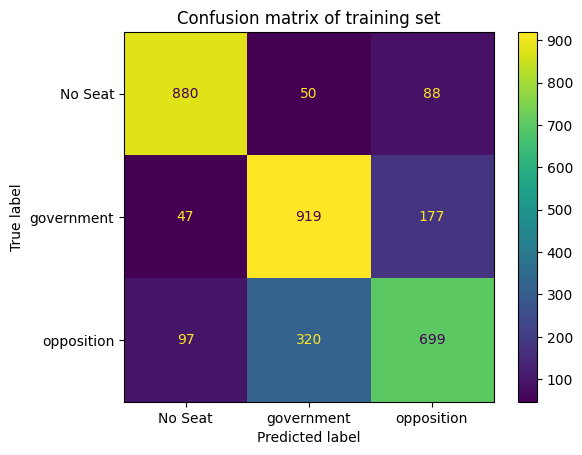

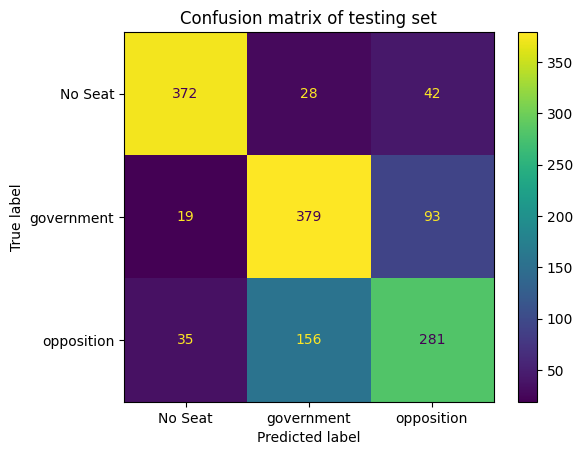

In [ ]:
# Plot confusion matrix of training set
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true=y_train, y_pred=y_predict_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No Seat', 'government','opposition'])
disp.plot()
plt.title('Confusion matrix of training set')
plt.show()

cm = confusion_matrix(y_true=y_test, y_pred=y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No Seat', 'government','opposition'])
disp.plot()
plt.title('Confusion matrix of testing set')
plt.show()

### - Best n_estimators:

*   นำค่า n_estimators แต่ละค่ามาสร้าง Model และนำ Performance ที่ได้มา Plot เป็นกราฟความสัมพันธ์ ซึ่งเราจะสามารถเลือกค่า n_estimators ที่ดีที่สุดได้ โดยเลือกค่าแรกที่เกิดการเปลี่ยนแปลง Accuracy ค่อนข้างคงที่
*   จากกราฟด้านล่าง ค่า n_estimators ดีที่สุด คือ 7



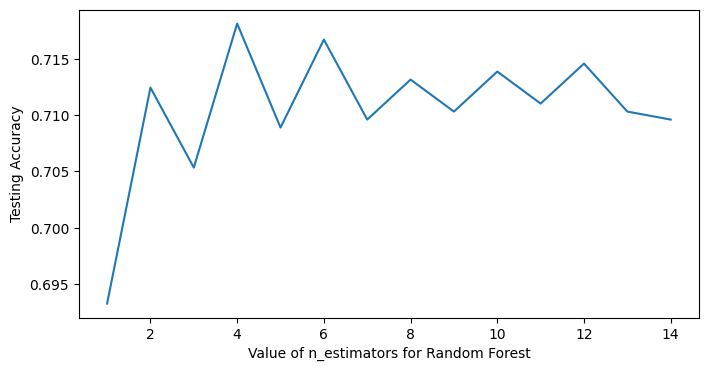

In [ ]:
#find best n_estimators
n_estimators_range = range(1, 15)
scores = []
for n in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n,random_state=0)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_predict))

plt.figure(figsize=(8,4))
plt.plot(n_estimators_range, scores)
plt.xlabel('Value of n_estimators for Random Forest')
plt.ylabel('Testing Accuracy')
plt.show()

### - Best max_depth:
*   นำค่า max_depth แต่ละค่ามาสร้าง Model และนำ Performance ที่ได้มา Plot เป็นกราฟความสัมพันธ์ ซึ่งเราจะสามารถเลือกค่า max_depth ที่ดีที่สุดได้ โดยเลือกค่าแรกที่เกิดการเปลี่ยนแปลง Accuracy และมีค่า Accuracy สูง
*   จากกราฟด้านล่าง ค่า max_depth ที่ดีที่สุด คือ 5

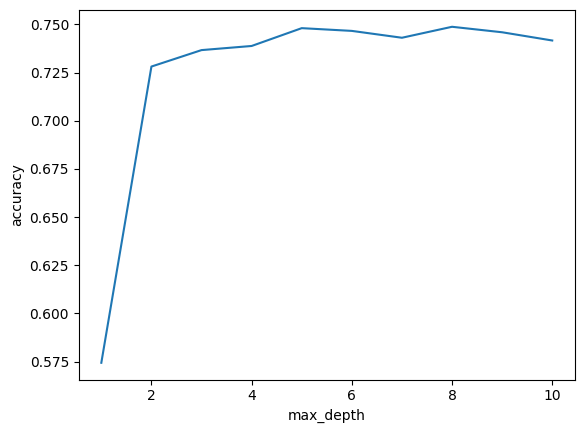

In [ ]:
#find best max_depth accuracy
max_depth = []
scores = []
for i in range(1, 11):
    model = RandomForestClassifier(max_depth=i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_predict))
    max_depth.append(i)
plt.plot(max_depth, scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

#**- K-Nearest Neighbors Model:**

*   นำ Feature ทั้ง 3 Attribute ได้แก่ mp_app_rank, mp_app_no, party_list_vote และ Target คือ status ที่สนใจมาแบ่งข้อมูลออกเป็น 2 ส่วน ได้แก่ ส่วน Train 70% และส่วน Test 30% เพื่อนำมาสร้าง Model

*   หลังจากนั้นนำมาหา K-Nearest Neighbors Model เนื่อจาก Target เป็น Categorical variables โดยนำข้อมูล X_train และ y_train มาใช้ในการสร้าง Model และนำมา Test ด้วย X_test และ y_test


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#split data to train and test
X = df_tf[['mp_app_no','mp_app_rank','party_list_vote']]
y = df_tf['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)

#train model
model_knn = KNeighborsClassifier(n_neighbors=30)
model_knn.fit(X_train, y_train)

#predict
y_predict = model_knn.predict(X_test)
y_predict_train = model_knn.predict(X_train)

# - Performance:

*   นำค่าที่ทำนายได้เปรียบเทียบกับ Target ที่เกิดขึ้นจริง และดู Performance ของ Train data กับ Test data



In [ ]:
#accuracy
accuracy_score(y_test, y_predict)

#proformance report
from sklearn.metrics import classification_report
print("\nTrain Model\n")
print(classification_report(y_train, y_predict_train))
print("\nTest Model\n")
print(classification_report(y_test, y_predict))


Train Model

              precision    recall  f1-score   support

     No Seat       0.84      0.87      0.85      1018
  government       0.75      0.71      0.73      1143
  opposition       0.68      0.69      0.69      1116

    accuracy                           0.75      3277
   macro avg       0.76      0.76      0.76      3277
weighted avg       0.75      0.75      0.75      3277


Test Model

              precision    recall  f1-score   support

     No Seat       0.85      0.85      0.85       442
  government       0.73      0.71      0.72       491
  opposition       0.67      0.69      0.68       472

    accuracy                           0.75      1405
   macro avg       0.75      0.75      0.75      1405
weighted avg       0.75      0.75      0.75      1405



*   จาก Performance เห็นได้ว่า K-Nearest Neighbors Model มีความแม่นยำในการทำนาย Dataset พอ ๆ กับ Random Forest Model และ Decision Tree Model
และเมื่อดู Performance ของ Train Data กับ Test Data เปรียบเทียบกัน จะสังเกตว่า Model ไม่มีการ Overfit


In [ ]:
y_train.value_counts()

government    1143
opposition    1116
No Seat       1018
Name: status, dtype: int64

In [ ]:
y_test.value_counts()

government    491
opposition    472
No Seat       442
Name: status, dtype: int64

###- Confusion Matrix:

*   Plot Confusion Matrix เพื่อดูจำนวน Data ที่ Model ทำนายถูก/ผิดของ Train data และ Test data จะสังเกตว่า opposition และ government ทำนายสลับกันค่อนข้างเยอะทั้งของ Train data และ Test data



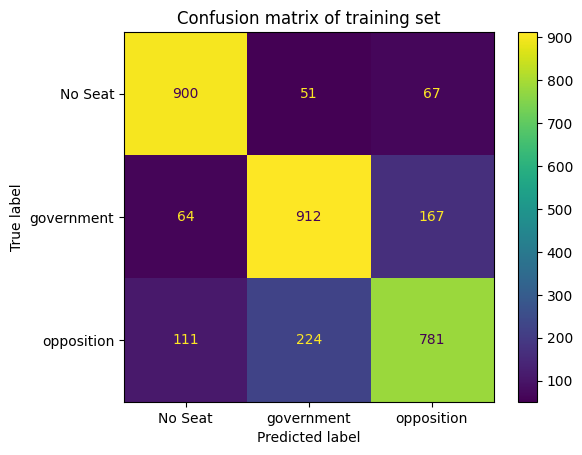

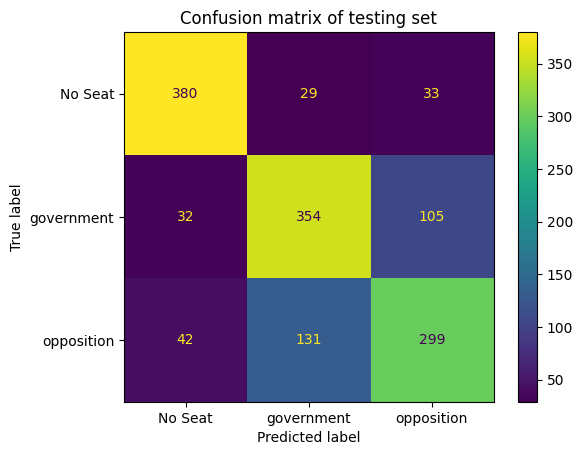

In [ ]:
# Plot confusion matrix of training set
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true=y_train, y_pred=y_predict_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No Seat', 'government','opposition'])
disp.plot()
plt.title('Confusion matrix of training set')
plt.show()

cm = confusion_matrix(y_true=y_test, y_pred=y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No Seat', 'government','opposition'])
disp.plot()
plt.title('Confusion matrix of testing set')
plt.show()

### - Best K value:

*   นำค่า K แต่ละค่ามาสร้าง Model และนำ Performance ที่ได้มา Plot เป็นกราฟความสัมพันธ์ ซึ่งเราจะสามารถเลือกค่า K ที่ดีที่สุดได้ โดยเลือกค่าแรกที่เกิดการเปลี่ยนแปลง Accuracy ค่อนข้างคงที่
*   จากกราฟด้านล่าง พบว่าค่า K ที่ดีที่สุด คือ 30

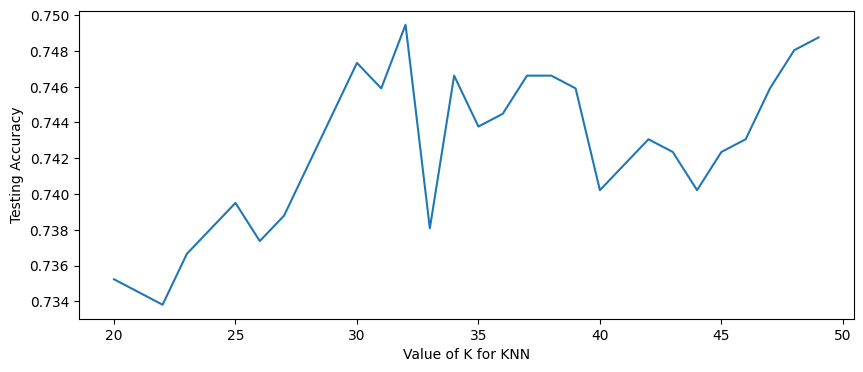

In [ ]:
#find best k
k_range = range(20, 50)
scores = []
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_predict))

plt.figure(figsize=(10,4))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

# - Results Analysis:

*   จากผลการทำนายของทั้ง 4 model พบว่า Model ทั้ง 4 แบบมีความแม่นยำพอ ๆ กัน ดังนั้นหากต้องการทำนาย Dataset นี้ สามารถใช้ Model แบบใดก็ได้ในการทำนาย เพราะ Performance ของทั้ง 4 Model มีค่าใกล้เคียงกัน
* Model ที่ได้ไม่เกิดการ overfitting เนื่องจากประเภทของข้อมูลที่ไม่ซับซ้อนมาก และการใช้ Hyper Parameter จำพวก max_depth, n_neighbors, n_estimators ช่วยลดการเกิด overfitting ได้ และเพิ่มความแม่นยำของ Model ได้เช่นกัน
* Feature ที่มีความสำคัญมากที่สุดในแต่ละ Model ได้แก่ Feature party_list_vote
* จากผลการทดลองพบว่า Model ที่มีการทำ Data Preprocessing มีความแม่นยำใกล้เคียงกันกับ Model ที่ไม่ได้ทำการ Data Preprocessing เนื่อง Model feature ที่ทำการ normalize ค่อนข้างมีความชัดเจนในการแบ่ง status อยู่แล้วทำให้หลังการ noramalize โดยเข้า function log จึงให้ผลค่อนข้างใกล้กัน
*   โดยจาก Performance ของ Model ที่เกิดขึ้น หากวิเคราะห์ข้อผิดพลาดส่วนใหญ่ของทั้ง 3 Model ในการทำนายของพรรคฝ่ายค้าน(opposition) และพรรครัฐบาล(government) สลับกัน ซึ่งอาจจะเกิดจากพรรคการเมืองบางพรรคมี Characteristics คล้ายคลึงกับพรรคการเมืองขั้วตรงข้าม
อาจสันนิษฐานได้ว่า
  1. บุคคลในพรรคการเมืองดังกล่าวเคยอยู่พรรครัฐบาล แต่เปลี่ยนขั้วมาอยู่พรรคฝ่ายค้าน หรืออาจเคยอยู่พรรคฝ่ายค้าน แต่เปลี่ยนขั้วมาอยู่พรรครัฐบาล
  2. พรรคการเมืองดังกล่าวอาจมีนโยบายพรรคที่คล้ายคลึงกับพรรคการเมืองขั้วตรงข้าม ทำให้มี Characteristics คล้ายคลึงกัน
*   ดังนั้นจึงสามารถสรุปได้ว่า Model ที่นำมาใช้ สามารถนำมาใช้ในการทำนายสถานการณ์จริงในการดูแนวโน้มของพรรคการเมืองได้ว่ามีอุดมการณ์ หรือแนวคิดไปในทิศทางใด หรือเกิดการเปลี่ยนขั้วอำนาจหรือไม่
*   ซึ่งหากสังเกต Performace, Characteristics ของพรรครัฐบาล และพรรคฝ่ายค้านจะค่อนข้างส่งผลต่อประสิทธิภาพในการทำนายของ Model เนื่องจาก Characteristics ของพรรคการเมืองนั้น ๆ ที่มีความคล้ายคลึงกัน ทำให้การจะแบ่งกลุ่มให้มีความแม่นยำสูง ๆ ค่อนข้างยาก




